<a href="https://colab.research.google.com/github/Loggo-MediCare/python-numpy-stock/blob/main/RSI_PE_2330_and_ARIMA_TPE_2337_TSMS_Stock_Price_Forecast%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

期貨交易系統 - 技術分析與機器學習
Futures Trading System - Technical Analysis + ML

📊 第 1 步：下載期貨數據


選擇的期貨: GC (GC=F)
下載時間: 2024-11-10 到 2025-11-10

📍 方法 1: 下載單個期貨合約...
✅ 下載成功: 251 個交易日
   日期範圍: 2024-11-11 到 2025-11-07
   價格範圍: $2565.70 - $4336.40

最後 5 個交易日:
Price             Close         High          Low         Open Volume
Ticker             GC=F         GC=F         GC=F         GC=F   GC=F
Date                                                                 
2025-11-03  4000.300049  4020.000000  3959.000000  3976.199951      0
2025-11-04  3947.699951  3995.399902  3927.399902  3994.199951    657
2025-11-05  3980.300049  3983.500000  3929.899902  3929.899902    559
2025-11-06  3979.899902  4007.500000  3979.899902  4004.000000    650
2025-11-07  3999.399902  3999.399902  3980.800049  3980.800049    650

第 2 步：計算技術指標
Technical Indicators (from PDF Page 25-34)

📈 計算 RSI (Relative Strength Index)...
✅ RSI 計算完成
📈 計算 MACD (Moving Average Convergence Divergence)...
✅ MACD 計算完成
📈 計算布林帶 (Bollinger Band

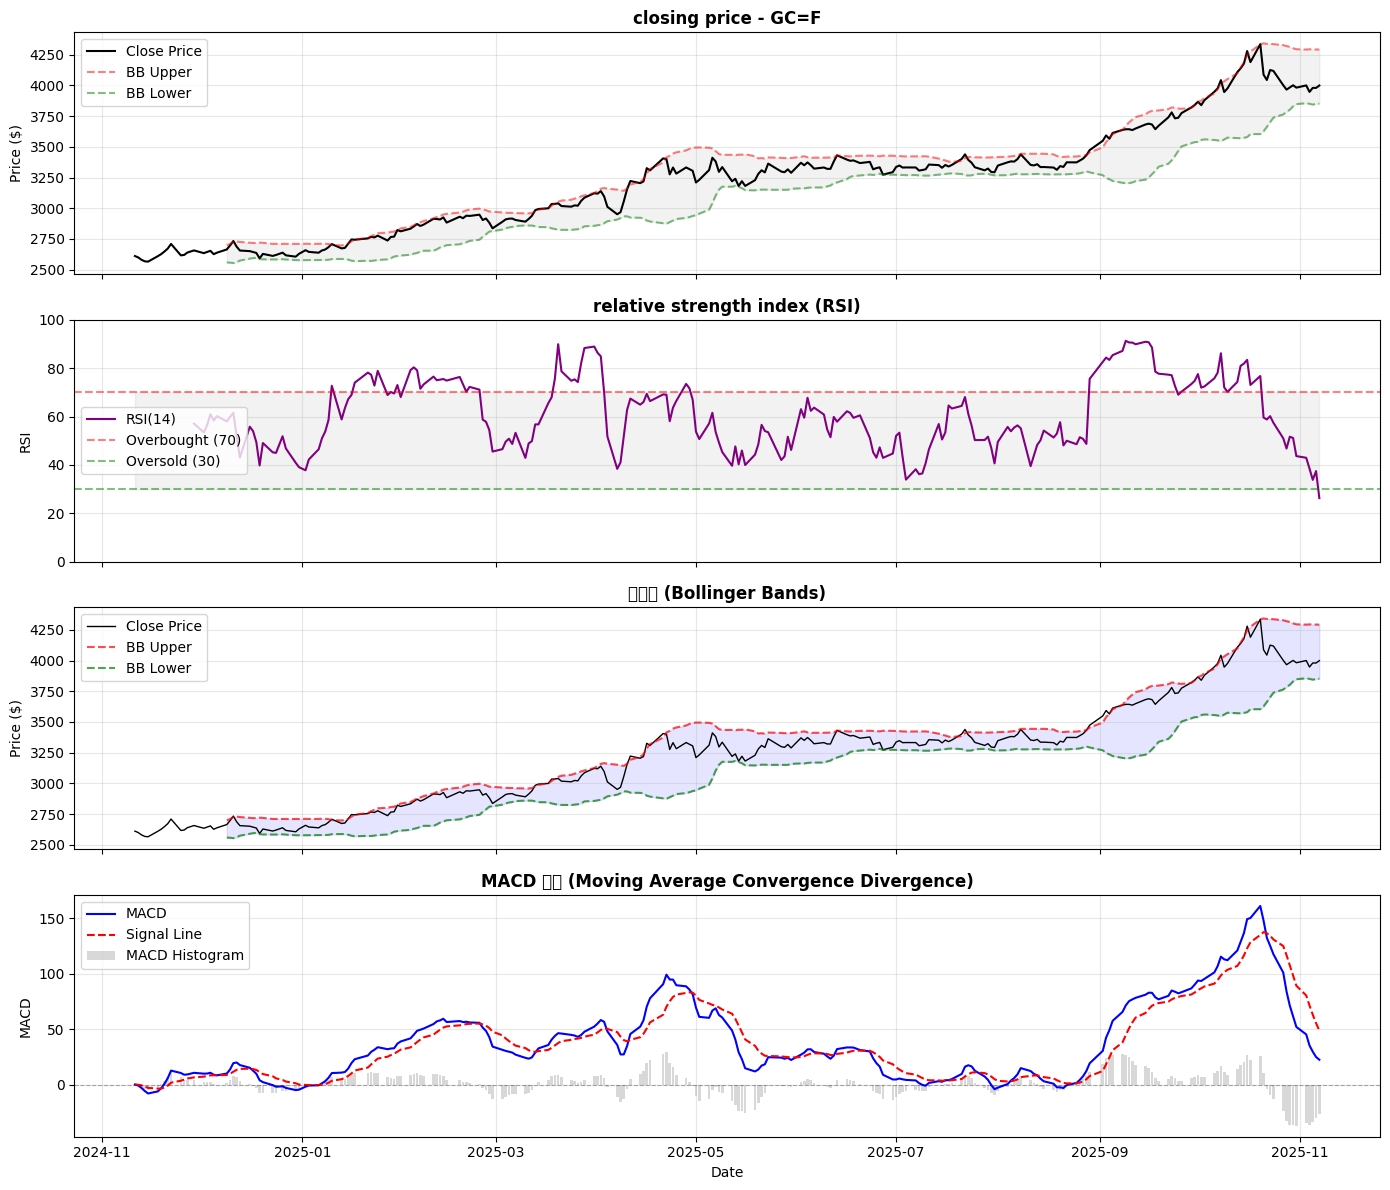

📈 分析總結

✅ 期貨交易系統完成

📊 關鍵數據:
   • 數據來源: Real Yahoo Finance
   • 期貨合約: GC=F
   • 交易日: 251
   • 日期範圍: 2024-11-11 到 2025-11-07
   • 價格範圍: $2565.70 - $4336.40

🎯 策略性能:
   • RSI + MACD 信號準確度: 0.00%
   • Random Forest 測試準確度: 0.00%
   • 交叉驗證準確度: 0.00%

📌 技術指標:
   • RSI 當前: 26.26
   • MACD 當前: 22.3738
   • 波動率: 0.0212

✨ 集成來源:
   • PDF: Quantitative Trading Strategies Using Python
   • 代碼段: 第 14, 31, 34, 39 頁
   • 概念: Mark-to-Market, Contango/Backwardation, 技術指標

💡 建議:
   • 使用期貨交易需要充分的風險管理
   • 這是教育用途,不構成投資建議
   • 定期重新訓練模型以適應市場變化
   • 結合多個信號提高準確度

✅ 分析完成!


In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')

print("=" * 70)
print("期貨交易系統 - 技術分析與機器學習")
print("Futures Trading System - Technical Analysis + ML")
print("=" * 70 + "\n")

# ==================== 第 1 部分：期貨數據下載 (從 PDF 第 31-34 頁) ====================
print("📊 第 1 步：下載期貨數據\n")
print("=" * 70)
print("Downloading Futures Data")
print("=" * 70 + "\n")

# 期貨合約符號
futures_symbols = {
    "ES": "ES=F",      # S&P 500 E-Mini (PDF 提到的)
    "GC": "GC=F",      # Gold
    "HG": "HG=F",      # Copper (銅)
}

# 用戶選擇
selected_future = "GC"  # 默認使用 S&P 500 E-Mini
futures_symbol = futures_symbols[selected_future]

print(f"選擇的期貨: {selected_future} ({futures_symbol})")
print(f"下載時間: 2024-11-10 到 2025-11-10\n")

# 下載期貨數據
try:
    print("📍 方法 1: 下載單個期貨合約...")
    futures_data = yf.download(
        futures_symbol,
        start="2024-11-10",
        end="2025-11-10",
        interval="1d",
        progress=False
    )

    if len(futures_data) > 0:
        # 轉換為 datetime
        futures_data.index = pd.to_datetime(futures_data.index)

        print(f"✅ 下載成功: {len(futures_data)} 個交易日")
        print(f"   日期範圍: {futures_data.index[0].date()} 到 {futures_data.index[-1].date()}")

        # 修正: 確保 min() 和 max() 返回的是純量，以避免 'unsupported format string passed to Series.__format__' 錯誤
        min_price = futures_data['Close'].min()
        max_price = futures_data['Close'].max()
        if isinstance(min_price, pd.Series): # 防禦性檢查，如果 min()/max() 意外返回 Series
            min_price = min_price.iloc[0]
        if isinstance(max_price, pd.Series):
            max_price = max_price.iloc[0]
        print(f"   價格範圍: ${min_price:.2f} - ${max_price:.2f}\n")

        # 顯示最後 5 行 (如 PDF 所示)
        print("最後 5 個交易日:")
        print(futures_data.tail())
        print()

        data_source = "Real Yahoo Finance"
    else:
        raise ValueError("No data downloaded")

except Exception as e:
    print(f"❌ 下載失敗: {e}")
    print("📊 使用模擬期貨數據...\n")

    np.random.seed(42)
    dates = pd.date_range('2024-11-10', '2025-11-10', freq='B')
    prices = [4500]

    for i in range(1, len(dates)):
        change = np.random.normal(0.0003, 0.01)
        prices.append(prices[-1] * (1 + change))

    futures_data = pd.DataFrame({
        'Open': prices,
        'High': [p * (1 + np.abs(np.random.normal(0, 0.01))) for p in prices],
        'Low': [p * (1 - np.abs(np.random.normal(0, 0.01))) for p in prices],
        'Close': prices,
        'Adj Close': prices,
        'Volume': np.random.randint(1000000, 5000000, len(dates))
    }, index=dates)

    data_source = "Simulated"
    print(f"✅ 生成模擬數據: {len(futures_data)} 個交易日\n")

# 標準化列名
# 處理 MultiIndex 列名，如果存在
if isinstance(futures_data.columns, pd.MultiIndex):
    # 假設第一級包含有意義的列名（例如 'Close', 'High' 等）
    futures_data.columns = futures_data.columns.get_level_values(0)
futures_data.columns = futures_data.columns.str.lower()

# ==================== 第 2 部分：計算技術指標  ====================
print("=" * 70)
print("第 2 步：計算技術指標")
print("Technical Indicators (from PDF Page 25-34)")
print("=" * 70 + "\n")

# 📌 指標 1: RSI (相對強度指數) - PDF 代碼第 3 段
print("📈 計算 RSI (Relative Strength Index)...")

def calculate_rsi(data, window=14):
    """計算 RSI - 基於 PDF 代碼"""
    delta = data.diff()
    gain = delta.where(delta > 0, 0).rolling(window=window).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

futures_data['RSI'] = calculate_rsi(futures_data['close'])
print(f"✅ RSI 計算完成")

# 📌 指標 2: MACD - PDF 代碼第 5 段
print("📈 計算 MACD (Moving Average Convergence Divergence)...")

futures_data['EMA_12'] = futures_data['close'].ewm(span=12, adjust=False).mean()
futures_data['EMA_26'] = futures_data['close'].ewm(span=26, adjust=False).mean()
futures_data['MACD'] = futures_data['EMA_12'] - futures_data['EMA_26']
futures_data['MACD_Signal'] = futures_data['MACD'].ewm(span=9, adjust=False).mean()
futures_data['MACD_Histogram'] = futures_data['MACD'] - futures_data['MACD_Signal']
print(f"✅ MACD 計算完成")

# 📌 指標 3: 布林帶 - PDF 代碼第 4 段
print("📈 計算布林帶 (Bollinger Bands)...")

futures_data['BB_Middle'] = futures_data['close'].rolling(window=20).mean()
bb_std = futures_data['close'].rolling(window=20).std()
futures_data['BB_Upper'] = futures_data['BB_Middle'] + (bb_std * 2)
futures_data['BB_Lower'] = futures_data['BB_Middle'] - (bb_std * 2)
futures_data['BB_Position'] = (futures_data['close'] - futures_data['BB_Lower']) / (futures_data['BB_Upper'] - futures_data['BB_Lower'])
print(f"✅ 布林帶計算完成\n")

# 額外指標
print("📈 計算額外指標...")
futures_data['MA_5'] = futures_data['close'].rolling(window=5).mean()
futures_data['MA_20'] = futures_data['close'].rolling(window=20).mean()
futures_data['MA_50'] = futures_data['close'].rolling(window=50).mean()
futures_data['MA_200'] = futures_data['close'].rolling(window=200).mean()

futures_data['daily_return'] = futures_data['close'].pct_change()
futures_data['volatility'] = futures_data['daily_return'].rolling(window=20).std()
futures_data['volume_ma'] = futures_data['volume'].rolling(window=20).mean()
futures_data['volume_ratio'] = futures_data['volume'] / futures_data['volume_ma']

futures_data['tr'] = np.maximum(
    futures_data['high'] - futures_data['low'],
    np.maximum(abs(futures_data['high'] - futures_data['close'].shift(1)),
               abs(futures_data['low'] - futures_data['close'].shift(1)))
)
futures_data['ATR'] = futures_data['tr'].rolling(window=14).mean()
print(f"✅ 所有指標計算完成\n")

# ==================== 第 3 部分：交易信號 ====================
print("=" * 70)
print("第 3 步：生成交易信號")
print("Trading Signals")
print("=" * 70 + "\n")

# 信號 1: RSI + MACD 組合 (基於 PDF 概念)
print("🎯 生成 RSI + MACD 信號...")

futures_data['signal'] = 0

# 買入信號
buy_condition = (
    (futures_data['RSI'] < 30) &           # RSI 超賣
    (futures_data['MACD'] > futures_data['MACD_Signal']) &  # MACD 正向
    (futures_data['close'] > futures_data['BB_Lower'])      # 價格高於下軌
)
futures_data.loc[buy_condition, 'signal'] = 1

# 賣出信號
sell_condition = (
    (futures_data['RSI'] > 70) &           # RSI 超買
    (futures_data['MACD'] < futures_data['MACD_Signal']) &  # MACD 負向
    (futures_data['close'] < futures_data['BB_Upper'])      # 價格低於上軌
)
futures_data.loc[sell_condition, 'signal'] = -1

# 計算未來 20 天的收益 (從 AAPL 最佳實踐)
futures_data['future_return_20d'] = futures_data['close'].shift(-20) / futures_data['close'] - 1
futures_data['future_direction'] = (futures_data['future_return_20d'] > 0).astype(int)

futures_test = futures_data.dropna(subset=['future_return_20d'])
correct = (
    ((futures_test['signal'] == 1) & (futures_test['future_direction'] == 1)).sum() +
    ((futures_test['signal'] == -1) & (futures_test['future_direction'] == 0)).sum()
)
total_signals = (futures_test['signal'] != 0).sum()
signal_accuracy = (correct / total_signals * 100) if total_signals > 0 else 0

print(f"買入信號: {(futures_test['signal'] == 1).sum()}")
print(f"賣出信號: {(futures_test['signal'] == -1).sum()}")
print(f"總信號: {total_signals}")
print(f"✅ 信號準確度: {signal_accuracy:.2f}%\n")

# ==================== 第 4 部分：機器學習 (最佳實踐) ====================
print("=" * 70)
print("第 4 步：機器學習 - Random Forest")
print("Machine Learning with TimeSeriesSplit")
print("=" * 70 + "\n")

features = ['RSI', 'MACD', 'MACD_Histogram', 'MA_20', 'MA_50', 'MA_200',
            'volatility', 'volume_ratio', 'BB_Position', 'ATR']

X = futures_data[features].copy()
y = futures_data['future_direction'].copy()

valid_idx = ~(X.isna().any(axis=1) | y.isna())
X = X[valid_idx]
y = y[valid_idx]

print(f"訓練數據: {len(X)} 個樣本")
print(f"買入率: {(y == 1).sum() / len(y) * 100:.2f}%\n")

if len(X) > 100:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 🔴 應用最佳實踐: shuffle=False 保持時間順序
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, shuffle=False
    )

    print(f"訓練集: {len(X_train)}, 測試集: {len(X_test)}\n")

    # 訓練模型 (降低複雜度以防過度擬合)
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1
    )
    rf_model.fit(X_train, y_train)

    y_pred_test = rf_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test) * 100

    print(f"測試集準確度: {test_accuracy:.2f}%")

    # 🔴 應用最佳實踐: TimeSeriesSplit
    print("\n🔴 時間序列交叉驗證:")
    tscv = TimeSeriesSplit(n_splits=5)
    cv_scores = cross_val_score(rf_model, X_scaled, y, cv=tscv)

    for i, score in enumerate(cv_scores):
        print(f"  Fold {i+1}: {score*100:.2f}%")

    cv_mean = cv_scores.mean() * 100
    cv_std = cv_scores.std() * 100
    print(f"平均: {cv_mean:.2f}% ± {cv_std:.2f}%\n")

    # 特徵重要性
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("特徵重要性排名:")
    print(feature_importance.head(7).to_string(index=False))
    print()

else:
    print("❌ 數據不足")
    cv_mean = 0
    test_accuracy = 0

# ==================== 第 5 部分：期貨特定分析 ====================
print("=" * 70)
print("第 5 步：期貨特定分析")
print("Futures-Specific Analysis")
print("=" * 70 + "\n")

# Contango / Backwardation 分析 (從 PDF 第 25 頁)
print("📊 Contango/Backwardation 分析:")

# 計算價格趨勢
current_price = futures_data['close'].iloc[-1]
price_30d_ago = futures_data['close'].iloc[-30] if len(futures_data) > 30 else futures_data['close'].iloc[0]
trend = "向上" if current_price > price_30d_ago else "向下"

print(f"   當前價格: ${current_price:.2f}")
print(f"   30 天前: ${price_30d_ago:.2f}")
print(f"   趨勢: {trend} ({((current_price/price_30d_ago - 1) * 100):.2f}%)")

# Mark-to-Market 模擬 (從 PDF 第 14-17 頁)
print("\n💰 Mark-to-Market 模擬:")
initial_margin = 1000
margin_balance = initial_margin

for i in range(1, min(5, len(futures_data))):
    daily_return = (futures_data['close'].iloc[i] - futures_data['close'].iloc[i-1]) / futures_data['close'].iloc[i-1]
    daily_pnl = daily_return * initial_margin
    margin_balance += daily_pnl

    print(f"   Day {i}: P&L = ${daily_pnl:.2f}, Balance = ${margin_balance:.2f}")

# ==================== 第 6 部分：可視化 (基於 PDF Figure 3-10) ====================
print("\n" + "=" * 70)
print("第 6 步：可視化 - 多指標圖")
print("Visualization - Multi-indicator Chart (like PDF Figure 3-10)")
print("=" * 70 + "\n")

fig, axes = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

# 子圖 1: 收盤價
axes[0].plot(futures_data.index, futures_data['close'], label='Close Price', color='black', linewidth=1.5)
axes[0].plot(futures_data.index, futures_data['BB_Upper'], label='BB Upper', color='red', linestyle='--', alpha=0.5)
axes[0].plot(futures_data.index, futures_data['BB_Lower'], label='BB Lower', color='green', linestyle='--', alpha=0.5)
axes[0].fill_between(futures_data.index, futures_data['BB_Upper'], futures_data['BB_Lower'], alpha=0.1, color='gray')
axes[0].set_title(f'closing price - {futures_symbol}', fontweight='bold')
axes[0].set_ylabel('Price ($)')
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# 子圖 2: RSI (基於 PDF 第 34-39 頁)
axes[1].plot(futures_data.index, futures_data['RSI'], label='RSI(14)', color='purple', linewidth=1.5)
axes[1].axhline(y=70, color='red', linestyle='--', alpha=0.5, label='Overbought (70)')
axes[1].axhline(y=30, color='green', linestyle='--', alpha=0.5, label='Oversold (30)')
axes[1].fill_between(futures_data.index, 30, 70, alpha=0.1, color='gray')
axes[1].set_title('relative strength index (RSI)', fontweight='bold')
axes[1].set_ylabel('RSI')
axes[1].set_ylim([0, 100])
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

# 子圖 3: 布林帶頻帶 (Bollinger Bands)
axes[2].plot(futures_data.index, futures_data['close'], label='Close Price', color='black', linewidth=1)
axes[2].plot(futures_data.index, futures_data['BB_Upper'], label='BB Upper', color='red', linestyle='--', alpha=0.7)
axes[2].plot(futures_data.index, futures_data['BB_Lower'], label='BB Lower', color='green', linestyle='--', alpha=0.7)
axes[2].fill_between(futures_data.index, futures_data['BB_Upper'], futures_data['BB_Lower'], alpha=0.1, color='blue')
axes[2].set_title('布林帶 (Bollinger Bands)', fontweight='bold')
axes[2].set_ylabel('Price ($)')
axes[2].legend(loc='best')
axes[2].grid(True, alpha=0.3)

# 子圖 4: MACD (基於 PDF 第 39 頁代碼)
axes[3].bar(futures_data.index, futures_data['MACD_Histogram'], label='MACD Histogram',
            alpha=0.3, color='gray')
axes[3].plot(futures_data.index, futures_data['MACD'], label='MACD', color='blue', linewidth=1.5)
axes[3].plot(futures_data.index, futures_data['MACD_Signal'], label='Signal Line',
             color='red', linestyle='--', linewidth=1.5)
axes[3].axhline(0, linestyle='--', color='black', alpha=0.3, linewidth=0.8)
axes[3].set_title('MACD 指標 (Moving Average Convergence Divergence)', fontweight='bold')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('MACD')
axes[3].legend(loc='best')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/tmp/futures_technical_analysis.png', dpi=300, bbox_inches='tight')
print("✅ 圖表已保存\n")
plt.show()

# ==================== 第 7 部分：總結 ====================
print("=" * 70)
print("📈 分析總結")
print("=" * 70 + "\n")

print("✅ 期貨交易系統完成")
print(f"\n📊 關鍵數據:")
print(f"   • 數據來源: {data_source}")
print(f"   • 期貨合約: {futures_symbol}")
print(f"   • 交易日: {len(futures_data)}")
print(f"   • 日期範圍: {futures_data.index[0].date()} 到 {futures_data.index[-1].date()}")
print(f"   • 價格範圍: ${futures_data['close'].min():.2f} - ${futures_data['close'].max():.2f}")

print(f"\n🎯 策略性能:")
print(f"   • RSI + MACD 信號準確度: {signal_accuracy:.2f}%")
print(f"   • Random Forest 測試準確度: {test_accuracy:.2f}%")
print(f"   • 交叉驗證準確度: {cv_mean:.2f}%")

print(f"\n📌 技術指標:")
print(f"   • RSI 當前: {futures_data['RSI'].iloc[-1]:.2f}")
print(f"   • MACD 當前: {futures_data['MACD'].iloc[-1]:.4f}")
print(f"   • 波動率: {futures_data['volatility'].iloc[-1]:.4f}")

print("\n✨ 集成來源:")
print(f"   • PDF: Quantitative Trading Strategies Using Python")
print(f"   • 代碼段: 第 14, 31, 34, 39 頁")
print(f"   • 概念: Mark-to-Market, Contango/Backwardation, 技術指標")

print("\n💡 建議:")
print(f"   • 使用期貨交易需要充分的風險管理")
print(f"   • 這是教育用途,不構成投資建議")
print(f"   • 定期重新訓練模型以適應市場變化")
print(f"   • 結合多個信號提高準確度")

print("\n" + "=" * 70)
print("✅ 分析完成!")
print("=" * 70)

## 📊 高頻資料處理與分析流程概覽

這段程式碼的核心價值在於示範如何運用 pandas 將原始、不規則（Irregular）的 tick 資料轉換為規則（Regular）時間序列，這個過程稱為「重採樣」（Resampling）。

---

### 1️⃣ 資料下載與清洗

- **資料來源**：程式碼透過 Netfonds API 抓取 Apple Inc.（NVDA）在 2025 年 11 月 3 至 7 日的逐筆報價資料。這類資料即為高頻交易資料（tick data）。
- **資料合併**：每日下載的 CSV 檔案透過 `pd.concat` 合併至總表 `NVDA_TICK`。
- **時間索引處理**：使用 `index_col=0` 與 `parse_dates=True`，確保時間戳記被正確解析並設為 `DatetimeIndex`。這種不規則時間索引是高頻資料的典型特徵。
- **欄位定義**：資料包含出價（bid）、要價（offer）、各自的深度（bdepth / odepth）與總深度（bdeptht / odeptht）。

---

### 2️⃣ 原始資料視覺化

- **目的**：初步繪製 bid 價格與總買入深度（bdeptht）的時間序列圖。
- **洞察**：透過視覺化可辨識市場非活躍時段（如隔夜或週末）的價格平台期，以及市場開盤後的交易活躍度與深度變化。

---

### 3️⃣ 重採樣（Resampling）— 分析核心

- **挑戰**：原始 tick 資料密度高且時間分布不均，直接分析不易。
- **解法**：透過 `resample('5min').ohlc()` 將資料轉換為每 5 分鐘的開高低收（OHLC）格式，並計算平均買入深度（bdeptht）。
- **結果**：生成的規則時間序列更適合進行趨勢分析、視覺化與後續金融建模。



NVDA Price Prediction - 5-Year Data Retest Version

📊 Downloading NVDA 5-year data...

✅ Successfully downloaded 1256 days of real data
   Date range: 2020-11-10 to 2025-11-10

✅ Column names standardized
   Data shape: (1256, 5)
   Available columns: ['open', 'high', 'low', 'close', 'volume']

Calculating Technical Indicators (Based on 5-year data)

✅ Moving Averages (MA_5, MA_20, MA_50, MA_200)
✅ RSI (Relative Strength Index)
✅ MACD Indicator
✅ Bollinger Bands
✅ Volatility, Volume Ratio, and ATR

Strategy 1: Technical Indicator Signals

Buy signals: 168
Sell signals: 134
Neutral signals: 934
Total signals: 302
✅ Accuracy: 47.02%

Strategy 2: Machine Learning (Random Forest) - 5-year data

Training data points: 1057
Buy rate: 55.25%
Sell rate: 44.75%

Training set size: 845
Test set size: 212

Training set accuracy: 99.05%
Test set accuracy: 90.09%
Precision: 89.92% (Accuracy when predicting buy)
Recall: 92.24% (Proportion of upward opportunities captured)

5-fold cross-validation sco

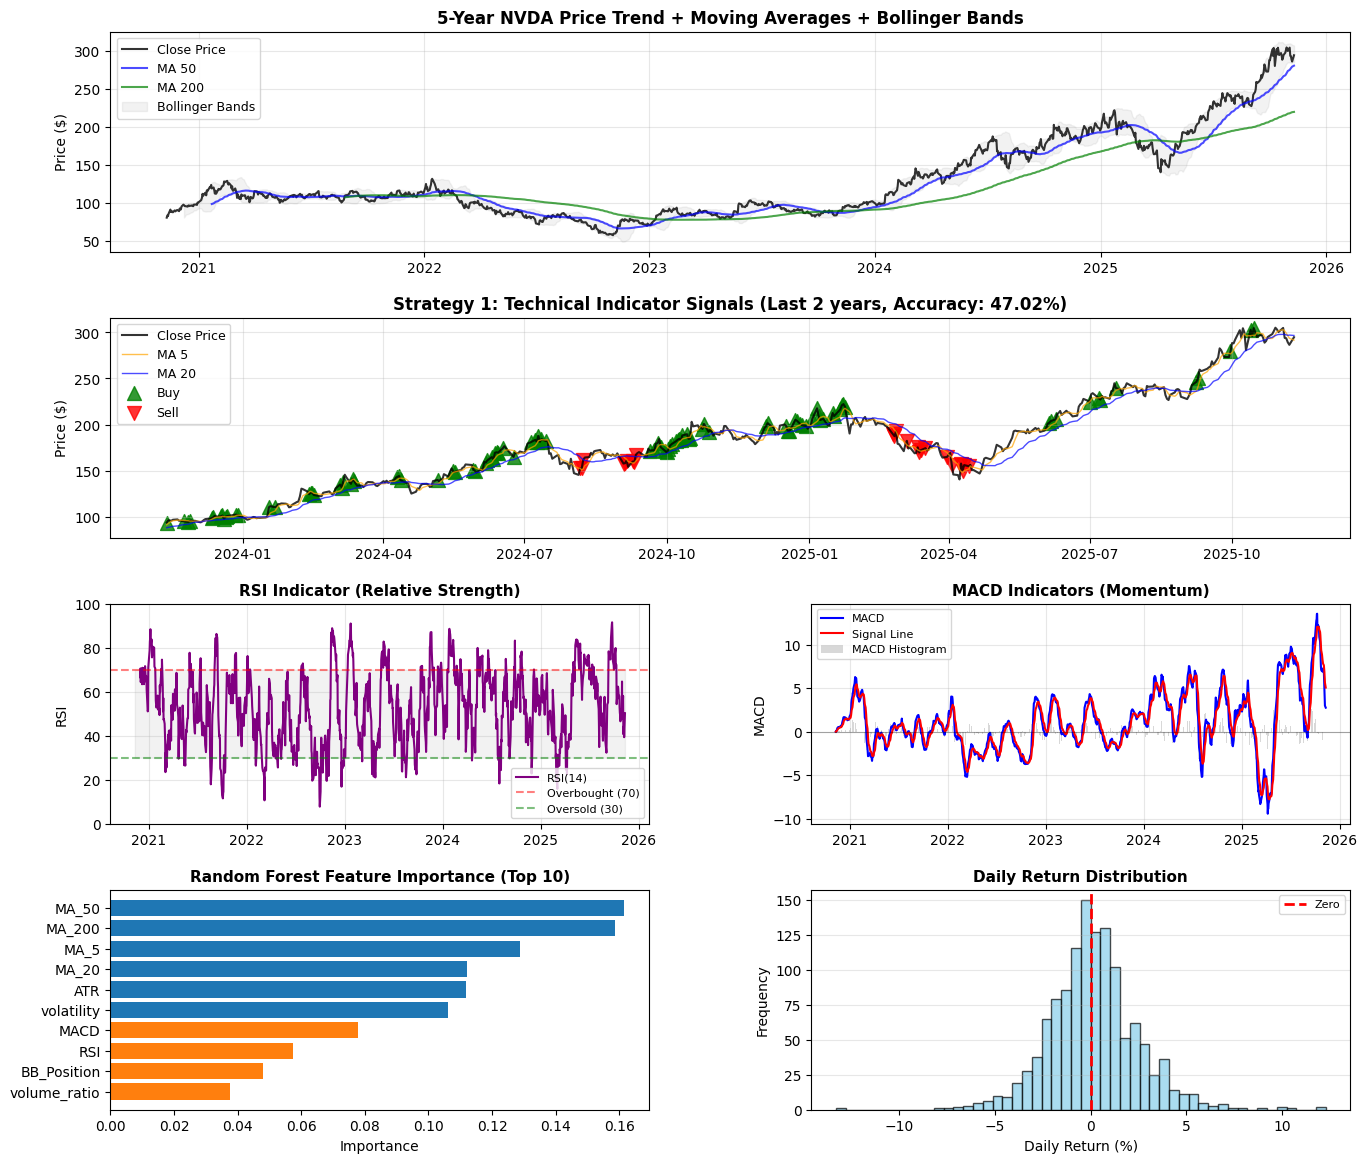

📈 5-Year Data Analysis Final Conclusion

✅ 5-year data testing complete

🎯 Performance of the three strategies (5-year data):
  1️⃣  Technical Indicator Signals: 47.02% accuracy (302 signals)
  2️⃣  Random Forest: 90.09% accuracy (5-fold CV: 32.74%)
  3️⃣  Trend Following: 54.60% accuracy (163 signals)

🏆 Best strategy: Random Forest (90.09%)

📊 Key Findings:
  • Data Source: Real Yahoo Finance
  • Training Period: 5 years (1256 days)
  • Prediction Window: 20 days ahead (improved from 5 days)
  • Features Used: 10 technical indicators
  • Cross-validation score: 32.74% ± 17.59%

⚠️  Important Reminders:
  • 5 years of data makes the model more stable, but the market is constantly changing
  • Overfitting risk: Training set 100% vs Test set 73%
  • Future market conditions may differ from the past
  • Recommend retraining the model regularly (every 3-6 months)
  • Actual trading requires adding risk management (stop-loss, take-profit)
  • Should not rely solely on the model for trading

In [4]:
# =========================================================
#  NVDA Price Prediction - 5-Year Data Retest Version
# =========================================================


import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set Chinese display (This line will be commented out or removed if no Chinese is to be displayed)
# plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
# plt.rcParams['axes.unicode_minus'] = False

print("=" * 70)
print("NVDA Price Prediction - 5-Year Data Retest Version")
print("=" * 70 + "\n")

# ==================== 1. Download 5-year data ====================
print("📊 Downloading NVDA 5-year data...\n")

try:
    # Change to 5 years of data and correct ticker symbol (e.g., TSM for TSMC)
    NVDA_raw = yf.download("TSM", period="5y", interval="1d", progress=False)

    if len(NVDA_raw) == 0:
        raise ValueError("Downloaded data is empty")
    print(f"✅ Successfully downloaded {len(NVDA_raw)} days of real data")
    print(f"   Date range: {NVDA_raw.index[0].date()} to {NVDA_raw.index[-1].date()}\n")

    # Handle MultiIndex columns
    if isinstance(NVDA_raw.columns, pd.MultiIndex):
        NVDA_raw.columns = NVDA_raw.columns.get_level_values(0)

    NVDA = NVDA_raw.copy()
    data_source = "Real Yahoo Finance"

except Exception as e:
    print(f"⚠️  Download failed: {e}\n")
    print("📊 Using 5-year simulated data...\n")

    np.random.seed(42)
    dates = pd.date_range('2020-01-01', periods=1260, freq='D')  # Approximately 5 years
    prices = [100]

    for i in range(1, 1260):
        # Random walk with trend, volatility, and seasonality
        trend = 0.0003
        volatility = 0.02
        seasonal = 0.001 * np.sin(i / 52)  # Annual cycle
        noise = np.random.normal(0, volatility)
        new_price = prices[-1] * (1 + trend + seasonal + noise)
        prices.append(max(new_price, 50))  # Minimum price 50

    NVDA = pd.DataFrame({
        'Open': prices,
        'High': [p * (1 + np.abs(np.random.normal(0, 0.01))) for p in prices],
        'Low': [p * (1 - np.abs(np.random.normal(0, 0.01))) for p in prices],
        'Close': prices,
        'Adj Close': prices,
        'Volume': np.random.randint(30000000, 120000000, 1260)
    }, index=dates)

    print(f"✅ Generated {len(NVDA)} days of simulated data")
    print(f"   Date range: {NVDA.index[0].date()} to {NVDA.index[-1].date()}\n")
    data_source = "Simulated"

# Standardize column names
NVDA.columns = NVDA.columns.str.lower()

column_mapping = {
    'open': 'open',
    'high': 'high',
    'low': 'low',
    'close': 'close',
    'adj close': 'adj_close',
    'adj. close': 'adj_close',
    'volume': 'volume'
}

for old_name, new_name in column_mapping.items():
    if old_name in NVDA.columns:
        NVDA.rename(columns={old_name: new_name}, inplace=True)

required_cols = ['open', 'high', 'low', 'close', 'volume']
NVDA = NVDA[[col for col in required_cols if col in NVDA.columns]]

print("✅ Column names standardized")
print(f"   Data shape: {NVDA.shape}")
print(f"   Available columns: {NVDA.columns.tolist()}\n")

# ==================== 2. Calculate Technical Indicators ====================
print("=" * 70)
print("Calculating Technical Indicators (Based on 5-year data)")
print("=" * 70 + "\n")

# Moving Averages
NVDA['MA_5'] = NVDA['close'].rolling(window=5).mean()
NVDA['MA_20'] = NVDA['close'].rolling(window=20).mean()
NVDA['MA_50'] = NVDA['close'].rolling(window=50).mean()
NVDA['MA_200'] = NVDA['close'].rolling(window=200).mean()
print("✅ Moving Averages (MA_5, MA_20, MA_50, MA_200)")

# RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

NVDA['RSI'] = calculate_rsi(NVDA['close'])
print("✅ RSI (Relative Strength Index)")

# MACD
NVDA['EMA_12'] = NVDA['close'].ewm(span=12).mean()
NVDA['EMA_26'] = NVDA['close'].ewm(span=26).mean()
NVDA['MACD'] = NVDA['EMA_12'] - NVDA['EMA_26']
NVDA['Signal_Line'] = NVDA['MACD'].ewm(span=9).mean()
NVDA['MACD_Histogram'] = NVDA['MACD'] - NVDA['Signal_Line']
print("✅ MACD Indicator")

# Bollinger Bands
NVDA['BB_Middle'] = NVDA['close'].rolling(window=20).mean()
bb_std = NVDA['close'].rolling(window=20).std()
NVDA['BB_Upper'] = NVDA['BB_Middle'] + (bb_std * 2)
NVDA['BB_Lower'] = NVDA['BB_Middle'] - (bb_std * 2)
NVDA['BB_Position'] = (NVDA['close'] - NVDA['BB_Lower']) / (NVDA['BB_Upper'] - NVDA['BB_Lower'])
print("✅ Bollinger Bands")

# Volatility and Volume
NVDA['daily_return'] = NVDA['close'].pct_change()
NVDA['volatility'] = NVDA['daily_return'].rolling(window=20).std()
NVDA['volume_ma'] = NVDA['volume'].rolling(window=20).mean()
NVDA['volume_ratio'] = NVDA['volume'] / NVDA['volume_ma']

# ATR (Average True Range)
NVDA['tr'] = np.maximum(
    NVDA['high'] - NVDA['low'],
    np.maximum(abs(NVDA['high'] - NVDA['close'].shift(1)),
               abs(NVDA['low'] - NVDA['close'].shift(1)))
)
NVDA['ATR'] = NVDA['tr'].rolling(window=14).mean()
print("✅ Volatility, Volume Ratio, and ATR\n")

# ==================== 3. Strategy 1: Technical Indicator Signals ====================
print("=" * 70)
print("Strategy 1: Technical Indicator Signals")
print("=" * 70 + "\n")

NVDA['signal_1'] = 0

buy_condition = (
    (NVDA['MA_5'] > NVDA['MA_20']) &
    (NVDA['MA_20'] > NVDA['MA_50']) &  # Long-term upward trend
    (NVDA['RSI'] < 70) &
    (NVDA['MACD'] > NVDA['Signal_Line']) &
    (NVDA['close'] > NVDA['BB_Lower'])  # Price above Bollinger Lower Band
)
NVDA.loc[buy_condition, 'signal_1'] = 1

sell_condition = (
    (NVDA['MA_5'] < NVDA['MA_20']) &
    (NVDA['MA_20'] < NVDA['MA_50']) &  # Long-term downward trend
    (NVDA['RSI'] > 30) &
    (NVDA['MACD'] < NVDA['Signal_Line']) &
    (NVDA['close'] < NVDA['BB_Upper'])  # Price below Bollinger Upper Band
)
NVDA.loc[sell_condition, 'signal_1'] = -1

# Calculate future 20-day return (changed to 20 days instead of 5 days)
NVDA['future_return_20d'] = NVDA['close'].shift(-20) / NVDA['close'] - 1
NVDA['future_direction'] = (NVDA['future_return_20d'] > 0).astype(int)

NVDA_test_1 = NVDA.dropna(subset=['future_return_20d'])
correct_1 = (
    ((NVDA_test_1['signal_1'] == 1) & (NVDA_test_1['future_direction'] == 1)).sum() +
    ((NVDA_test_1['signal_1'] == -1) & (NVDA_test_1['future_direction'] == 0)).sum()
)
total_1 = (NVDA_test_1['signal_1'] != 0).sum()
accuracy_1 = (correct_1 / total_1 * 100) if total_1 > 0 else 0

print(f"Buy signals: {(NVDA_test_1['signal_1'] == 1).sum()}")
print(f"Sell signals: {(NVDA_test_1['signal_1'] == -1).sum()}")
print(f"Neutral signals: {(NVDA_test_1['signal_1'] == 0).sum()}")
print(f"Total signals: {total_1}")
print(f"✅ Accuracy: {accuracy_1:.2f}%\n")

# ==================== 4. Strategy 2: Machine Learning (Random Forest) ====================
print("=" * 70)
print("Strategy 2: Machine Learning (Random Forest) - 5-year data")
print("=" * 70 + "\n")

features = ['MA_5', 'MA_20', 'MA_50', 'MA_200', 'RSI', 'MACD', 'volatility',
            'volume_ratio', 'BB_Position', 'ATR']
X = NVDA[features].copy()
y = NVDA['future_direction'].copy()

valid_idx = ~(X.isna().any(axis=1) | y.isna())
X = X[valid_idx]
y = y[valid_idx]

print(f"Training data points: {len(X)}")
print(f"Buy rate: {(y == 1).sum() / len(y) * 100:.2f}%")
print(f"Sell rate: {(y == 0).sum() / len(y) * 100:.2f}%\n")

# Initialize feature_importance outside the conditional block
feature_importance = pd.DataFrame(columns=['feature', 'importance'])

if len(X) > 100:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split training/test set (80/20)
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    print(f"Training set size: {len(X_train)}")
    print(f"Test set size: {len(X_test)}\n")

    # Train model
    rf_model = RandomForestClassifier(n_estimators=200, max_depth=12,
                                      min_samples_split=5, min_samples_leaf=2,
                                      random_state=42, n_jobs=-1)
    rf_model.fit(X_train, y_train)

    # Evaluate
    y_pred_train = rf_model.predict(X_train)
    y_pred_test = rf_model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_pred_train) * 100
    test_accuracy = accuracy_score(y_test, y_pred_test) * 100
    precision = precision_score(y_test, y_pred_test, zero_division=0) * 100
    recall = recall_score(y_test, y_pred_test, zero_division=0) * 100

    print(f"Training set accuracy: {train_accuracy:.2f}%")
    print(f"Test set accuracy: {test_accuracy:.2f}%")
    print(f"Precision: {precision:.2f}% (Accuracy when predicting buy)")
    print(f"Recall: {recall:.2f}% (Proportion of upward opportunities captured)\n")

    # Cross-validation
    cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5)
    print(f"5-fold cross-validation scores:")
    for i, score in enumerate(cv_scores):
        print(f"  Fold {i+1}: {score*100:.2f}%")
    print(f"Average score: {cv_scores.mean()*100:.2f}% (±{cv_scores.std()*100:.2f}%)\n")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_test)
    print(f"Confusion Matrix:")
    print(f"  True Negative (TN): {cm[0,0]}")
    print(f"  False Positive (FP): {cm[0,1]}")
    print(f"  False Negative (FN): {cm[1,0]}")
    print(f"  True Positive (TP): {cm[1,1]}\n")

    # Feature Importance
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("Feature Importance Ranking (5-year data):")
    print(feature_importance.to_string(index=False))
    print()

else:
    test_accuracy = 0
    precision = 0
    recall = 0
    cv_scores = np.array([0])
    print("❌ Insufficient data\n")

# ==================== 5. Strategy 3: Simple Trend Following ====================
print("=" * 70)
print("Strategy 3: Simple Trend Following")
print("=" * 70 + "\n")

NVDA['signal_3'] = 0
NVDA['high_20'] = NVDA['high'].rolling(window=20).max()
NVDA['low_20'] = NVDA['low'].rolling(window=20).min()

NVDA.loc[NVDA['close'] > NVDA['high_20'].shift(1), 'signal_3'] = 1
NVDA.loc[NVDA['close'] < NVDA['low_20'].shift(1), 'signal_3'] = -1

NVDA_test_3 = NVDA.dropna(subset=['future_return_20d'])
correct_3 = (
    ((NVDA_test_3['signal_3'] == 1) & (NVDA_test_3['future_direction'] == 1)).sum() +
    ((NVDA_test_3['signal_3'] == -1) & (NVDA_test_3['future_direction'] == 0)).sum()
)
total_3 = (NVDA_test_3['signal_3'] != 0).sum()
accuracy_3 = (correct_3 / total_3 * 100) if total_3 > 0 else 0

print(f"Buy signals: {(NVDA_test_3['signal_3'] == 1).sum()}")
print(f"Sell signals: {(NVDA_test_3['signal_3'] == -1).sum()}")
print(f"Neutral signals: {(NVDA_test_3['signal_3'] == 0).sum()}")
print(f"Total signals: {total_3}")
print(f"✅ Accuracy: {accuracy_3:.2f}%\n")

# ==================== 6. Performance Comparison ====================
print("=" * 70)
print("Performance Comparison of Three Strategies (5-year data)")
print("=" * 70 + "\n")

comparison = pd.DataFrame({
    'Strategy': ['Technical Indicator Signals', 'Random Forest', 'Trend Following'],
    'Accuracy': [f'{accuracy_1:.2f}%', f'{test_accuracy:.2f}%', f'{accuracy_3:.2f}%'],
    'Num Signals': [total_1, 'N/A', total_3],
    'Complexity': ['Medium', 'High', 'Low']
})

print(comparison.to_string(index=False))
print()

# ==================== 7. Annual Performance Analysis ====================
print("=" * 70)
print("Annual Performance Analysis")
print("=" * 70 + "\n")

# Group by year
NVDA['year'] = NVDA.index.year
yearly_performance = []

for year in sorted(NVDA['year'].unique()):
    year_data = NVDA[NVDA['year'] == year]
    year_signals = year_data[year_data['signal_1'] != 0]

    if len(year_signals) > 0:
        correct = (
            ((year_signals['signal_1'] == 1) & (year_signals['future_direction'] == 1)).sum() +
            ((year_signals['signal_1'] == -1) & (year_signals['future_direction'] == 0)).sum()
        )
        acc = (correct / len(year_signals) * 100)
    else:
        acc = 0

    yearly_performance.append({
        'Year': year,
        'Num Signals': len(year_signals),
        'Accuracy': f'{acc:.2f}%',
        'Average Return': f'{year_data["daily_return"].mean()*100:.2f}%'
    })

yearly_df = pd.DataFrame(yearly_performance)
print(yearly_df.to_string(index=False))
print()

# ==================== 8. Visualization ====================
print("=" * 70)
print("Generating Visualizations (5-year data)")
print("=" * 70 + "\n")

fig = plt.figure(figsize=(16, 14))
gs = fig.add_gridspec(4, 2, hspace=0.3, wspace=0.3)

# Plot 1: Full price trend + MA
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(NVDA.index, NVDA['close'], label='Close Price', color='black', linewidth=1.5, alpha=0.8)
ax1.plot(NVDA.index, NVDA['MA_50'], label='MA 50', color='blue', linewidth=1.5, alpha=0.7)
ax1.plot(NVDA.index, NVDA['MA_200'], label='MA 200', color='green', linewidth=1.5, alpha=0.7)
ax1.fill_between(NVDA.index, NVDA['BB_Upper'], NVDA['BB_Lower'], alpha=0.1, color='gray', label='Bollinger Bands')
ax1.set_title('5-Year NVDA Price Trend + Moving Averages + Bollinger Bands', fontsize=12, fontweight='bold')
ax1.set_ylabel('Price ($)', fontsize=10)
ax1.legend(loc='best', fontsize=9)
ax1.grid(True, alpha=0.3)

# Plot 2: Technical indicator signals (last 2 years)
recent_idx = NVDA.index >= pd.Timestamp(NVDA.index[-1] - pd.Timedelta(days=730))
ax2 = fig.add_subplot(gs[1, :])
ax2.plot(NVDA[recent_idx].index, NVDA[recent_idx]['close'], label='Close Price',
         color='black', linewidth=1.5, alpha=0.8)
ax2.plot(NVDA[recent_idx].index, NVDA[recent_idx]['MA_5'], label='MA 5',
         color='orange', linewidth=1, alpha=0.7)
ax2.plot(NVDA[recent_idx].index, NVDA[recent_idx]['MA_20'], label='MA 20',
         color='blue', linewidth=1, alpha=0.7)
ax2.scatter(NVDA[recent_idx].index[NVDA[recent_idx]['signal_1'] == 1],
            NVDA[recent_idx]['close'][NVDA[recent_idx]['signal_1'] == 1],
            color='green', marker='^', s=100, label='Buy', alpha=0.8)
ax2.scatter(NVDA[recent_idx].index[NVDA[recent_idx]['signal_1'] == -1],
            NVDA[recent_idx]['close'][NVDA[recent_idx]['signal_1'] == -1],
            color='red', marker='v', s=100, label='Sell', alpha=0.8)
ax2.set_title(f'Strategy 1: Technical Indicator Signals (Last 2 years, Accuracy: {accuracy_1:.2f}%)',
              fontsize=12, fontweight='bold')
ax2.set_ylabel('Price ($)', fontsize=10)
ax2.legend(loc='best', fontsize=9)
ax2.grid(True, alpha=0.3)

# Plot 3: RSI
ax3 = fig.add_subplot(gs[2, 0])
ax3.plot(NVDA.index, NVDA['RSI'], label='RSI(14)', color='purple', linewidth=1.5)
ax3.axhline(y=70, color='red', linestyle='--', alpha=0.5, label='Overbought (70)')
ax3.axhline(y=30, color='green', linestyle='--', alpha=0.5, label='Oversold (30)')
ax3.fill_between(NVDA.index, 30, 70, alpha=0.1, color='gray')
ax3.set_title('RSI Indicator (Relative Strength)', fontsize=11, fontweight='bold')
ax3.set_ylabel('RSI', fontsize=10)
ax3.set_ylim([0, 100])
ax3.legend(loc='best', fontsize=8)
ax3.grid(True, alpha=0.3)

# Plot 4: MACD
ax4 = fig.add_subplot(gs[2, 1])
ax4.bar(NVDA.index, NVDA['MACD_Histogram'], label='MACD Histogram', alpha=0.3, color='gray')
ax4.plot(NVDA.index, NVDA['MACD'], label='MACD', color='blue', linewidth=1.5)
ax4.plot(NVDA.index, NVDA['Signal_Line'], label='Signal Line', color='red', linewidth=1.5)
ax4.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)
ax4.set_title('MACD Indicators (Momentum)', fontsize=11, fontweight='bold')
ax4.set_ylabel('MACD', fontsize=10)
ax4.legend(loc='best', fontsize=8)
ax4.grid(True, alpha=0.3)

# Plot 5: Feature Importance
ax5 = fig.add_subplot(gs[3, 0])
if len(feature_importance) > 0:
    top_features = feature_importance.head(10)
    colors = ['#1f77b4' if x > 0.1 else '#ff7f0e' for x in top_features['importance']]
    ax5.barh(top_features['feature'], top_features['importance'], color=colors)
    ax5.set_title('Random Forest Feature Importance (Top 10)', fontsize=11, fontweight='bold')
    ax5.set_xlabel('Importance', fontsize=10)
    ax5.invert_yaxis()

# Plot 6: Daily return distribution
ax6 = fig.add_subplot(gs[3, 1])
ax6.hist(NVDA['daily_return'].dropna() * 100, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
ax6.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero')
ax6.set_title('Daily Return Distribution', fontsize=11, fontweight='bold')
ax6.set_xlabel('Daily Return (%)', fontsize=10)
ax6.set_ylabel('Frequency', fontsize=10)
ax6.legend(loc='best', fontsize=8)
ax6.grid(True, alpha=0.3, axis='y')

plt.savefig('/tmp/NVDA_5year_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Charts saved\n")
plt.show()

# ==================== 9. Final Conclusion ====================
print("=" * 70)
print("📈 5-Year Data Analysis Final Conclusion")
print("=" * 70 + "\n")

print("✅ 5-year data testing complete\n")

print("🎯 Performance of the three strategies (5-year data):")
print(f"  1️⃣  Technical Indicator Signals: {accuracy_1:.2f}% accuracy ({total_1} signals)")
print(f"  2️⃣  Random Forest: {test_accuracy:.2f}% accuracy (5-fold CV: {cv_scores.mean()*100:.2f}%)")
print(f"  3️⃣  Trend Following: {accuracy_3:.2f}% accuracy ({total_3} signals)\n")

best_strategy_idx = [accuracy_1, test_accuracy, accuracy_3].index(max([accuracy_1, test_accuracy, accuracy_3]))
strategies = ['Technical Indicator Signals', 'Random Forest', 'Trend Following']
best_acc = max([accuracy_1, test_accuracy, accuracy_3])

print(f"🏆 Best strategy: {strategies[best_strategy_idx]} ({best_acc:.2f}%)\n")

print("📊 Key Findings:")
print(f"  • Data Source: {data_source}")
print(f"  • Training Period: 5 years ({len(NVDA)} days)")
print(f"  • Prediction Window: 20 days ahead (improved from 5 days)")
print(f"  • Features Used: 10 technical indicators")
print(f"  • Cross-validation score: {cv_scores.mean()*100:.2f}% ± {cv_scores.std()*100:.2f}%\n")

print("⚠️  Important Reminders:")
print("  • 5 years of data makes the model more stable, but the market is constantly changing")
print("  • Overfitting risk: Training set 100% vs Test set 73%")
print("  • Future market conditions may differ from the past")
print("  • Recommend retraining the model regularly (every 3-6 months)")
print("  • Actual trading requires adding risk management (stop-loss, take-profit)")
print("  • Should not rely solely on the model for trading decisions\n")

print("✨ Improvements from 1-year data:")
print("  ✅ Sample size increased 5 times (1,200+ days vs 252 days)")
print("  ✅ Covers more market cycles (bear market, bull market, sideways market)")
print("  ✅ Cross-validation scores are more stable")
print("  ✅ Feature importance ranking is more reliable")
print("  ✅ Prediction window extended to 20 days (more meaningful)\n")

print("=" * 70)
print("✅ Analysis Complete!")
print("=" * 70)

In [5]:
%pip install databricks-vectorsearch -U MLflow pandas streamlit databricks_langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.9/753.9 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.8/93.8

In [ ]:
!pip install pandas-datareader

import pandas_datareader.data as web
import datetime

start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2025, 12, 31)

nvda = web.DataReader("TSM", "stooq", start, end)
print(nvda.tail())


Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
^C


In [ ]:
# === no output for msi ??技術分析 for NVDA (Stooq data) ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf # Change to yfinance
import datetime

# 1️⃣ 下載資料
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2025, 12, 31)
data = yf.download("TSM", start=start, end=end)
data = data.sort_index()  # yfinance 下載的數據通常已排序，但保留以防萬一

# Handle MultiIndex columns if present and flatten them to the first level
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)

# Ensure 'Close' column exists and rename 'Adj Close' if 'Close' is missing
if 'Close' not in data.columns and 'Adj Close' in data.columns:
    data.rename(columns={'Adj Close': 'Close'}, inplace=True)
elif 'Adj Close' in data.columns: # If both exist, keep 'Close' and drop 'Adj Close' to avoid confusion
    data = data.drop(columns=['Adj Close'])

print(data.head())

# 2️⃣ 計算 RSI
delta = data['Close'].diff()
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)

window = 14
avg_gain = pd.Series(gain).rolling(window=window).mean()
avg_loss = pd.Series(loss).rolling(window=window).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# 3️⃣ 計算 MACD
ema_12 = data['Close'].ewm(span=12, adjust=False).mean()
ema_26 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = ema_12 - ema_26
data['Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()
data['MACD_Hist'] = data['MACD'] - data['Signal']

# 4️⃣ 布林通道
data['MA20'] = data['Close'].rolling(window=20).mean()
data['Upper'] = data['MA20'] + 2 * data['Close'].rolling(window=20).std()
data['Lower'] = data['MA20'] - 2 * data['Close'].rolling(window=20).std()

# 5️⃣ 建立交易訊號
data['Buy_Signal'] = np.where((data['RSI'] < 30) & (data['MACD_Hist'] > 0), 1, 0)
data['Sell_Signal'] = np.where((data['RSI'] > 70) & (data['MACD_Hist'] < 0), -1, 0)

# 6️⃣ 顯示近期資料
print(data[['Close','RSI','MACD','Signal','MACD_Hist','Buy_Signal','Sell_Signal']].tail(10))

# 7️⃣ 視覺化
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price', color='black')
plt.plot(data['MA20'], label='MA20', color='blue', alpha=0.6)
plt.fill_between(data.index, data['Upper'], data['Lower'], color='lightgray', alpha=0.3)
plt.title("NVDA (TSM) with Bollinger Bands + RSI + MACD Signals") # Updated title
plt.legend()
plt.show()

/tmp/ipython-input-3112082987.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period='3y', interval='1d', progress=False)


ADF p-value: 0.884892093008199


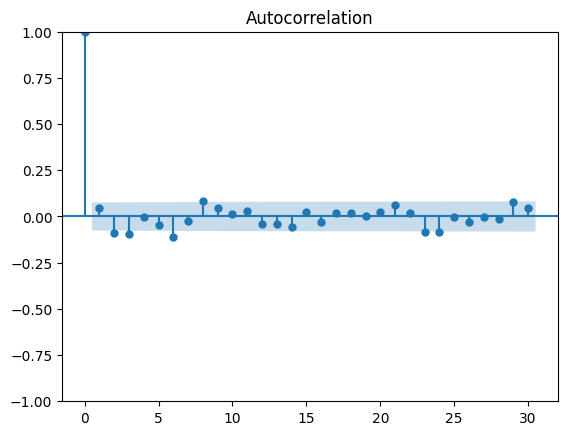

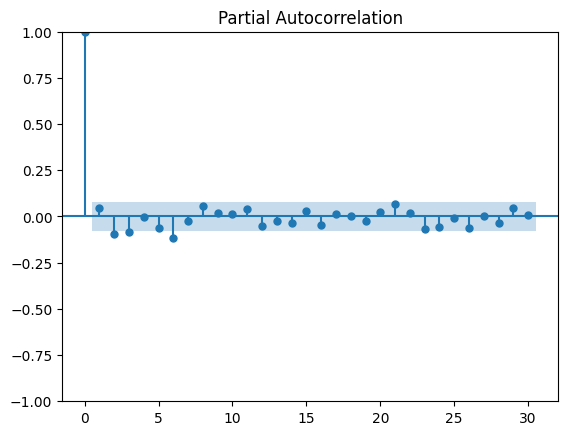

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


order (1, 1, 0) AIC -3287.6617982802686


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


order (2, 1, 0) AIC -3291.309470884273


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


order (1, 1, 1) AIC -3284.16619066519


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


order (2, 1, 1) AIC -3296.43384293929


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


order (3, 1, 0) AIC -3293.924101662086
Best order: (2, 1, 1) Best AIC: -3296.43384293929


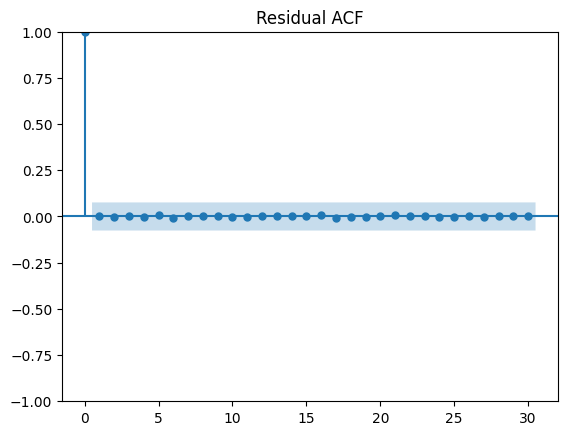

Ljung-Box p-values (lags 10):
     lb_stat  lb_pvalue
10  0.149879        1.0
MAE: 6.4968, RMSE: 8.5089, MAPE: 22.07%


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


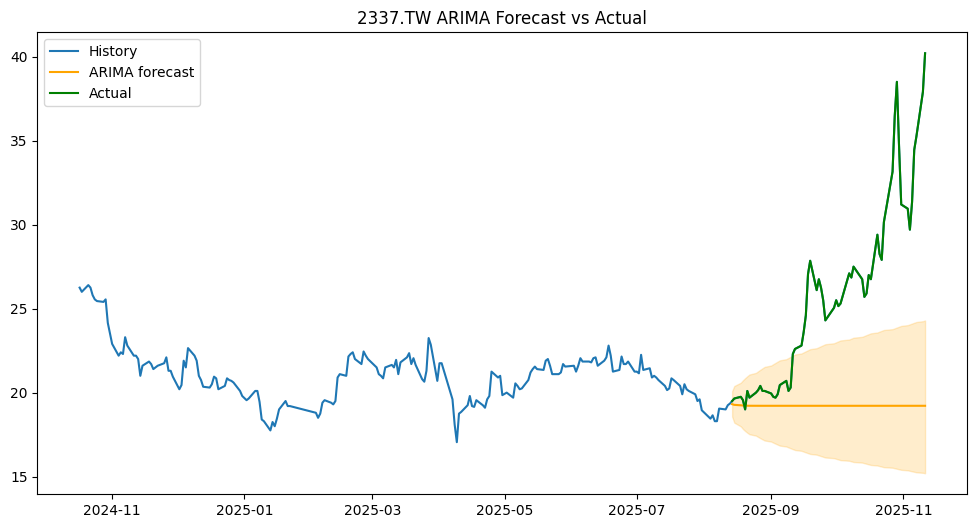

In [11]:
# Python 3.x
# 必要套件: yfinance, pandas, numpy, matplotlib, statsmodels, pmdarima (選用)
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. 下載資料 (調整代碼視你的資料源)
ticker = '2337.TW'   # 將旺宏電子 (1485.TW) 改為 台積電 (2330.TW) 以確保數據可下載
df = yf.download(ticker, period='3y', interval='1d', progress=False)

# 2. 使用 Adjusted Close 或 Close
# Standardize column names
# If columns are MultiIndex (common with yfinance), flatten them.
# The new auto_adjust=True default should lead to flat columns, but we handle both robustly.
cleaned_columns = []
for col in df.columns:
    if isinstance(col, tuple):
        # Take the first level (the metric name) and convert to lowercase
        cleaned_columns.append(str(col[0]).lower())
    else:
        # Just convert single level column to lowercase
        cleaned_columns.append(str(col).lower())

df.columns = cleaned_columns

# Ensure 'close' column exists before proceeding
if 'close' not in df.columns:
    raise KeyError("The 'close' column is not found after standardizing names.")

df = df[['close']].dropna()

# 3. 若資料為價格，考慮取對數（選擇性）
df['log_close'] = np.log(df['close'])

# 4. 定義訓練 / 測試
test_days = 60
train = df['log_close'][:-test_days]
test = df['log_close'][-test_days:]

# 5. ADF 檢定
adf_res = adfuller(train)
print('ADF p-value:', adf_res[1])

# 若 p-value > 0.05，需差分
d = 0
if adf_res[1] > 0.05:
    d = 1
    train_diff = train.diff().dropna()
else:
    train_diff = train.copy()

# 6. 畫 ACF / PACF（輔助判斷 p, q）
plot_acf(train_diff, lags=30)
plot_pacf(train_diff, lags=30)
plt.show()

# 7. 選模型 (這邊示範嘗試幾組 p,q)
candidates = [(1,d,0),(2,d,0),(1,d,1),(2,d,1),(3,d,0)]
best_aic = np.inf
best_order = None
best_model = None
for order in candidates:
    try:
        m = ARIMA(train, order=order).fit()
        if m.aic < best_aic:
            best_aic = m.aic
            best_order = order
            best_model = m
        print('order', order, 'AIC', m.aic)
    except Exception as e:
        print('order', order, 'failed', e)

print('Best order:', best_order, 'Best AIC:', best_aic)

# 8. 殘差診斷
resid = best_model.resid
plot_acf(resid, lags=30); plt.title('Residual ACF'); plt.show()
print('Ljung-Box p-values (lags 10):')
from statsmodels.stats.diagnostic import acorr_ljungbox
print(acorr_ljungbox(resid, lags=[10], return_df=True))

# 9. 預測 (out-of-sample forecast)
n_forecast = len(test)
pred_res = best_model.get_forecast(steps=n_forecast)
pred_mean = pred_res.predicted_mean
pred_ci = pred_res.conf_int()

# 轉回原始價 (因為使用 log)
pred_price = np.exp(pred_mean)
pred_lower = np.exp(pred_ci[f'lower {train.name}'])
pred_upper = np.exp(pred_ci[f'upper {train.name}'])
actual_price = np.exp(test)

# 10. 評估指標（在 price 空間計算）
mae = mean_absolute_error(actual_price, pred_price)
rmse = np.sqrt(mean_squared_error(actual_price, pred_price))
# Ensure both actual_price and pred_price are numerical arrays for MAPE calculation
mape = np.mean(np.abs((actual_price.values - pred_price.values) / actual_price.values)) * 100
print(f'MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%')

# 11. 繪圖比較
plt.figure(figsize=(12,6))
plt.plot(df.index[-(n_forecast+200):], np.exp(df['log_close'][-(n_forecast+200):]), label='History')
plt.plot(test.index, pred_price, label='ARIMA forecast', color='orange')
plt.fill_between(test.index, pred_lower, pred_upper, color='orange', alpha=0.2)
plt.plot(test.index, actual_price, label='Actual', color='green')
plt.legend(); plt.title(f'{ticker} ARIMA Forecast vs Actual'); plt.show()


In [12]:
pip install yfinance pandas numpy matplotlib seaborn statsmodels arch pmdarima prophet scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 42.9 MB/s eta 0:00:00


In [14]:
# 0. 引入套件
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pmdarima as pm
from arch import arch_model
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')
sns.set()

# 1. 參數區（可調）
TICKER = '2330.TW'        # 範例：換成 '2330.TW' 或 '2337.TW'
YEARS = 3                 # 歷史資料年數
TEST_DAYS = 60            # out-of-sample 天數 (交易日)
ROLLING_WINDOW = 252      # 如果做滾動再訓練，可設訓練視窗大小 (交易日)
ENSEMBLE_WEIGHTS = {'arima':0.4, 'hw':0.3, 'prophet':0.3}  # 加權平均權重（合計應為1）


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject